In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/Datasets/Flowers/train'
valid_path = 'D:/Datasets/Flowers/test'

In [4]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
 # useful for getting number of output classes
folders = glob( 'D:/Datasets/Flowers/train/*')

In [7]:
folders

['D:/Datasets/Flowers/train\\astilbe',
 'D:/Datasets/Flowers/train\\bellflower',
 'D:/Datasets/Flowers/train\\black_eyed_susan',
 'D:/Datasets/Flowers/train\\calendula',
 'D:/Datasets/Flowers/train\\california_poppy',
 'D:/Datasets/Flowers/train\\carnation',
 'D:/Datasets/Flowers/train\\common_daisy',
 'D:/Datasets/Flowers/train\\coreopsis',
 'D:/Datasets/Flowers/train\\daffodil',
 'D:/Datasets/Flowers/train\\dandelion',
 'D:/Datasets/Flowers/train\\iris',
 'D:/Datasets/Flowers/train\\magnolia',
 'D:/Datasets/Flowers/train\\rose',
 'D:/Datasets/Flowers/train\\sunflower',
 'D:/Datasets/Flowers/train\\tulip',
 'D:/Datasets/Flowers/train\\water_lily']

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory( 'D:/Datasets/Flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11804 images belonging to 16 classes.


In [14]:
test_set = test_datagen.flow_from_directory( 'D:/Datasets/Flowers/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3936 images belonging to 16 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
369/369 [==============================] - 415s 1s/step - loss: 3.3771 - accuracy: 0.6995 - val_loss: 3.9774 - val_accuracy: 0.7203
Epoch 2/10
369/369 [==============================] - 378s 1s/step - loss: 2.3027 - accuracy: 0.8155 - val_loss: 5.5876 - val_accuracy: 0.7053
Epoch 3/10
369/369 [==============================] - 355s 963ms/step - loss: 2.1508 - accuracy: 0.8448 - val_loss: 5.6530 - val_accuracy: 0.7246
Epoch 4/10
369/369 [==============================] - 352s 954ms/step - loss: 1.8020 - accuracy: 0.8699 - val_loss: 4.2103 - val_accuracy: 0.7973
Epoch 5/10
369/369 [==============================] - 356s 965ms/step - loss: 1.6170 - accuracy: 0.8847 - val_loss: 4.1045 - val_accuracy: 0.8087
Epoch 6/10
369/369 [==============================] - 357s 967ms/step - loss: 1.6560 - accuracy: 0.8881 - val_loss: 5.6187 - val_accuracy: 0.7812
Epoch 7/10
369/369 [==============================] - 367s 996ms/step - loss: 1.5044 - accuracy: 0.9024 - val_loss: 5.2231 - val_a

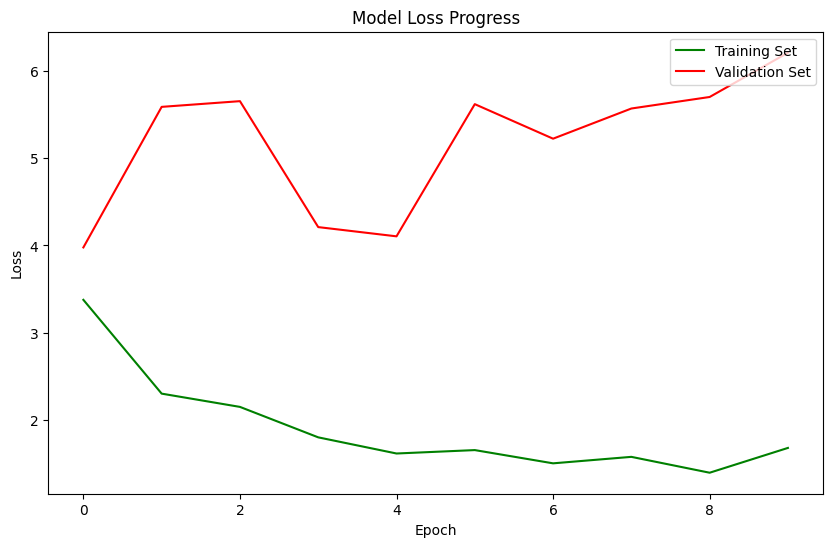

In [17]:
# plot the loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(r.history['loss'], color='green')
plt.plot(r.history['val_loss'], color='red')
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.savefig('latest_loss.png', dpi=350, bbox_inches='tight')
plt.show()

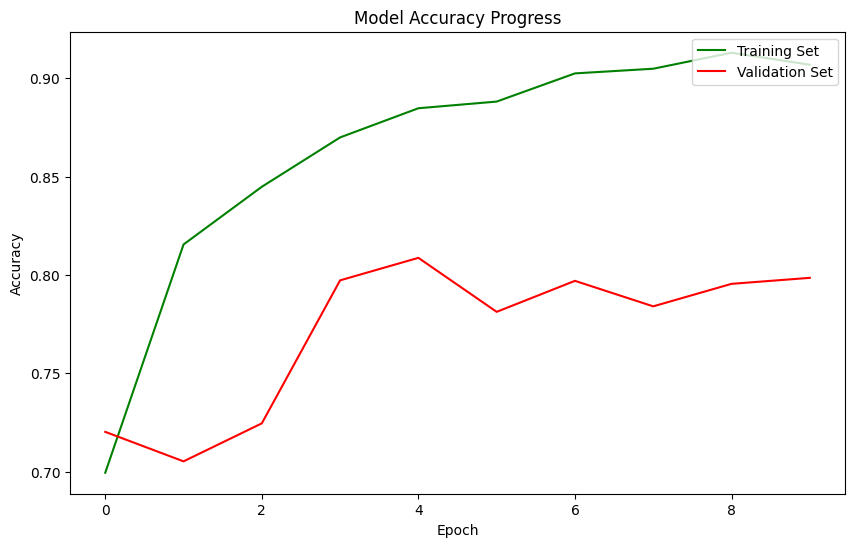

In [18]:
# plot the accuracy

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(r.history['accuracy'], color='green')
plt.plot(r.history['val_accuracy'], color='red')
plt.title('Model Accuracy Progress')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.savefig('latest_accuracy.png', dpi=350, bbox_inches='tight')
plt.show()

In [19]:
model.save_weights("inceptionv3.hdf5")

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [24]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
y_pred = model.predict(test_set)

123/123 [==============================] - 80s 642ms/step


In [26]:
y_pred

array([[0.00000000e+00, 5.58195530e-31, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.64878116e-33, 9.46517460e-08, 0.00000000e+00, ...,
        0.00000000e+00, 1.19622296e-14, 3.72095820e-35],
       [0.00000000e+00, 7.38033870e-11, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.24919192e-35],
       [0.00000000e+00, 0.00000000e+00, 3.17057932e-17, ...,
        0.00000000e+00, 3.76133374e-34, 2.74314648e-15]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([ 9, 10, 10, ..., 13, 14, 11], dtype=int64)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_inception.h5')

In [32]:
img=image.load_img('D:/Datasets/Flowers/test/calendula/46040782351_a1937412dc_c.jpg',target_size=(224,224))

In [33]:
x=image.img_to_array(img)
x

array([[[40., 37., 32.],
        [39., 36., 31.],
        [39., 36., 31.],
        ...,
        [42., 62., 27.],
        [43., 63., 26.],
        [43., 63., 26.]],

       [[38., 35., 30.],
        [37., 34., 29.],
        [36., 33., 28.],
        ...,
        [40., 60., 25.],
        [40., 60., 25.],
        [40., 60., 23.]],

       [[35., 32., 27.],
        [35., 32., 27.],
        [34., 31., 26.],
        ...,
        [36., 55., 23.],
        [35., 54., 22.],
        [35., 55., 20.]],

       ...,

       [[33., 23., 21.],
        [33., 23., 21.],
        [33., 23., 21.],
        ...,
        [11., 10.,  8.],
        [10.,  9.,  7.],
        [10.,  9.,  7.]],

       [[33., 23., 21.],
        [33., 23., 21.],
        [33., 23., 21.],
        ...,
        [11., 10.,  8.],
        [10.,  9.,  7.],
        [10.,  9.,  7.]],

       [[33., 23., 21.],
        [33., 23., 21.],
        [33., 23., 21.],
        ...,
        [11., 10.,  8.],
        [10.,  9.,  7.],
        [10.,  9.,  7.]]

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
img_data

array([[[[-0.9987697 , -0.99886197, -0.99901575],
         [-0.99880046, -0.9988927 , -0.9990465 ],
         [-0.99880046, -0.9988927 , -0.9990465 ],
         ...,
         [-0.9987082 , -0.99809307, -0.9991695 ],
         [-0.99867743, -0.9980623 , -0.9992003 ],
         [-0.99867743, -0.9980623 , -0.9992003 ]],

        [[-0.9988312 , -0.9989235 , -0.99907726],
         [-0.99886197, -0.99895424, -0.999108  ],
         [-0.9988927 , -0.998985  , -0.9991388 ],
         ...,
         [-0.9987697 , -0.9981546 , -0.99923104],
         [-0.9987697 , -0.9981546 , -0.99923104],
         [-0.9987697 , -0.9981546 , -0.99929255]],

        [[-0.9989235 , -0.99901575, -0.9991695 ],
         [-0.9989235 , -0.99901575, -0.9991695 ],
         [-0.99895424, -0.9990465 , -0.9992003 ],
         ...,
         [-0.9988927 , -0.99830836, -0.99929255],
         [-0.9989235 , -0.9983391 , -0.9993233 ],
         [-0.9989235 , -0.99830836, -0.9993849 ]],

        ...,

        [[-0.998985  , -0.99929255, -0

In [40]:
model.predict(img_data)

1/1 [==============================] - 0s 104ms/step


array([[7.2893894e-15, 5.0127073e-03, 7.2997649e-16, 9.6609938e-01,
        7.9018436e-09, 8.7814971e-07, 4.8799688e-04, 2.3620719e-15,
        2.5530511e-10, 8.7679661e-22, 3.1138928e-08, 9.4831848e-06,
        4.6968371e-06, 1.4165204e-08, 2.7855162e-02, 5.2960974e-04]],
      dtype=float32)